NAMA : VATHURROSI

MATA KULIAH : PROYEK SAINS DATA

KELAS : IF5D



# DATA UNDERSTANDING

# PENGUMPULAN DATA

Saya mengambil data dari website www.bmkg.com yang selanjutnya akan di uji sebagai Tugas UTS dari mata kuliah Proyek Sains Data. Berikut ini adalah langkah-langkah untuk mengerjakan tugas ini.

# TUJUAN MENGAMBIL DATA

Tujuan mengambil data curah hujan untuk prediksi curah hujan adalah untuk mendapatkan informasi historis yang dapat digunakan untuk menganalisis pola curah hujan yang terjadi diwilayah surabaya.

Import Package yang akan digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px
import seaborn as sb

color_pal = sns.color_palette()
plt.style.use("fivethirtyeight")

ambil dataset untuk di letakkan di data frame

In [ ]:
import pandas as pd

# Membaca data dari file Excel
df = pd.read_excel("datacurahhujan.xlsx")

# Membalikkan urutan data dan mereset index
df = df.iloc[::-1].reset_index(drop=True)

# Menampilkan data yang telah diubah
df.head()


,Tanggal,RR
0,30-04-2024,0.0
1,29-04-2024,0.0
2,28-04-2024,0.0
3,27-04-2024,6.5
4,26-04-2024,10.0


In [ ]:
df["Tanggal"] = pd.to_datetime(df["Tanggal"], dayfirst=True)
df.head()

,Tanggal,RR
0,2024-04-30,0.0
1,2024-04-29,0.0
2,2024-04-28,0.0
3,2024-04-27,6.5
4,2024-04-26,10.0


Ploting Data

Text(0.5, 1.0, 'Curah Hujan Perhari')

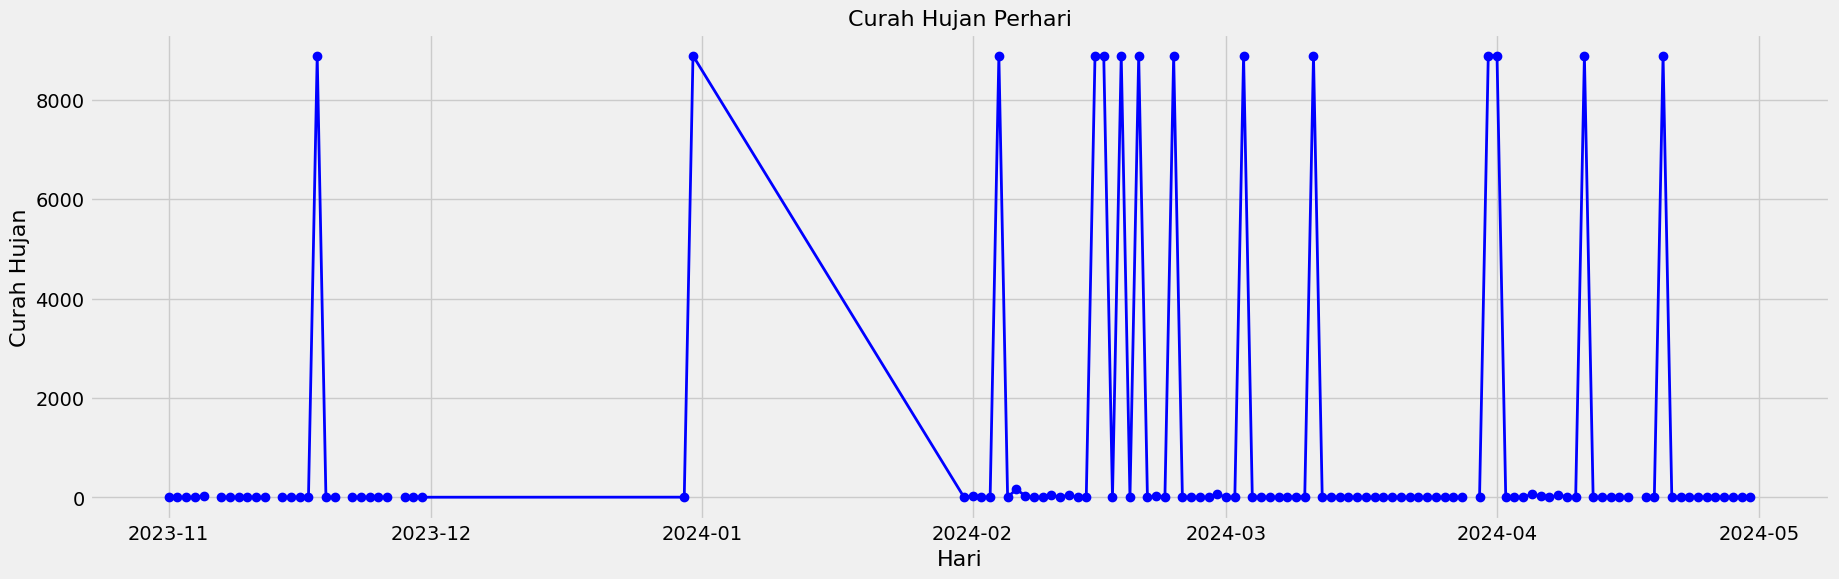

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
plt.plot(df["Tanggal"], df['RR'], lw=2, color='blue', marker='o')
# Menambahkan label dan judul
plt.xlabel("Hari", fontsize=16)
plt.ylabel("Curah Hujan", fontsize=16)
plt.title("Curah Hujan Perhari", fontsize=16)

In [ ]:
df.describe()

,Tanggal,RR
count,123,117.000000
mean,2024-02-14 02:55:36.585365760,1070.912821
min,2023-11-01 00:00:00,0.000000
25%,2023-12-30 12:00:00,0.000000
50%,2024-02-29 00:00:00,1.400000
75%,2024-03-30 12:00:00,11.700000
max,2024-04-30 00:00:00,8888.000000
std,NaN,2894.438927


salin dataframe, untuk digunakan sebagai data yang akan diolah

In [ ]:
df_slide = df.copy()

# Extrasi Fitur atau Sliding Window

melakukan ekstrasi fitur yang nantinya akan digunakan sebagai data dari proyek

In [ ]:
# Membuat kolom baru untuk nilai RR (curah hujan) yang digeser (geser ke belakang)
df_slide['xt-3'] = df_slide['RR'].shift(3)  # Nilai 3 langkah ke belakang
df_slide['xt-2'] = df_slide['RR'].shift(2)  # Nilai 2 langkah ke belakang
df_slide['xt-1'] = df_slide['RR'].shift(1)  # Nilai 1 langkah ke belakang
df_slide['xt'] = df_slide['RR']             # Nilai saat ini sebagai target/output

# Menghapus baris dengan nilai NaN karena shifting
df_slide = df_slide.dropna()

# Menampilkan 5 baris pertama dari DataFrame df_slide
df_slide.head()


,Tanggal,RR,xt-3,xt-2,xt-1,xt
3,2024-04-27,6.5,0.0,0.0,0.0,6.5
4,2024-04-26,10.0,0.0,0.0,6.5,10.0
5,2024-04-25,0.4,0.0,6.5,10.0,0.4
6,2024-04-24,11.7,6.5,10.0,0.4,11.7
7,2024-04-23,0.0,10.0,0.4,11.7,0.0


from matplotlib import pyplot as plt
_df_0['RR'].plot(kind='hist', bins=20, title='RR')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['xt-3'].plot(kind='hist', bins=20, title='xt-3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['xt-2'].plot(kind='hist', bins=20, title='xt-2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['xt-1'].plot(kind='hist', bins=20, title='xt-1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='RR', y='xt-3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='xt-3', y='xt-2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='xt-2', y='xt-1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='xt-1', y='xt', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Tanggal']
  ys = series['RR']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Tanggal', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Tanggal')
_ = plt.ylabel('RR')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Tanggal']
  ys = series['xt-2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Tanggal', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Tanggal')
_ = plt.ylabel('xt-2')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Tanggal']
  ys = series['xt-1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Tanggal', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Tanggal')
_ = plt.ylabel('xt-1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Tanggal']
  ys = series['xt']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Tanggal', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Tanggal')
_ = plt.ylabel('xt')

from matplotlib import pyplot as plt
_df_12['RR'].plot(kind='line', figsize=(8, 4), title='RR')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['xt-3'].plot(kind='line', figsize=(8, 4), title='xt-3')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['xt-2'].plot(kind='line', figsize=(8, 4), title='xt-2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['xt-1'].plot(kind='line', figsize=(8, 4), title='xt-1')
plt.gca().spines[['top', 'right']].set_visible(False)



*   xt-3: Nilai curah hujan 3 waktu sebelumnya., tipe data ini adalah numerik
*   xt-2: Nilai curah hujan 2 waktu sebelumnya., tipe data ini adalah numerik
*   xt-1: Nilai curah hujan 1 waktu sebelumnya., tipe data ini adalah numerik
*   xt: Nilai curah hujan saat ini., tipe data ini adalah numerik



In [ ]:
# Menampilkan jumlah baris dan kolom dari DataFrame
rows, cols = df_slide.shape
print(f"Jumlah baris: {rows}")
print(f"Jumlah kolom: {cols}")


Jumlah baris: 93
Jumlah kolom: 7


In [ ]:
df_slide.dtypes

,0
Tanggal,datetime64[ns]
RR,float64
xt-3,float64
xt-2,float64
xt-1,float64
xt,float64
predicted_xt,float64


# Visualisasi Data

# Tabel Distribusi

In [ ]:
df_slide = df_slide.set_index('Tanggal')

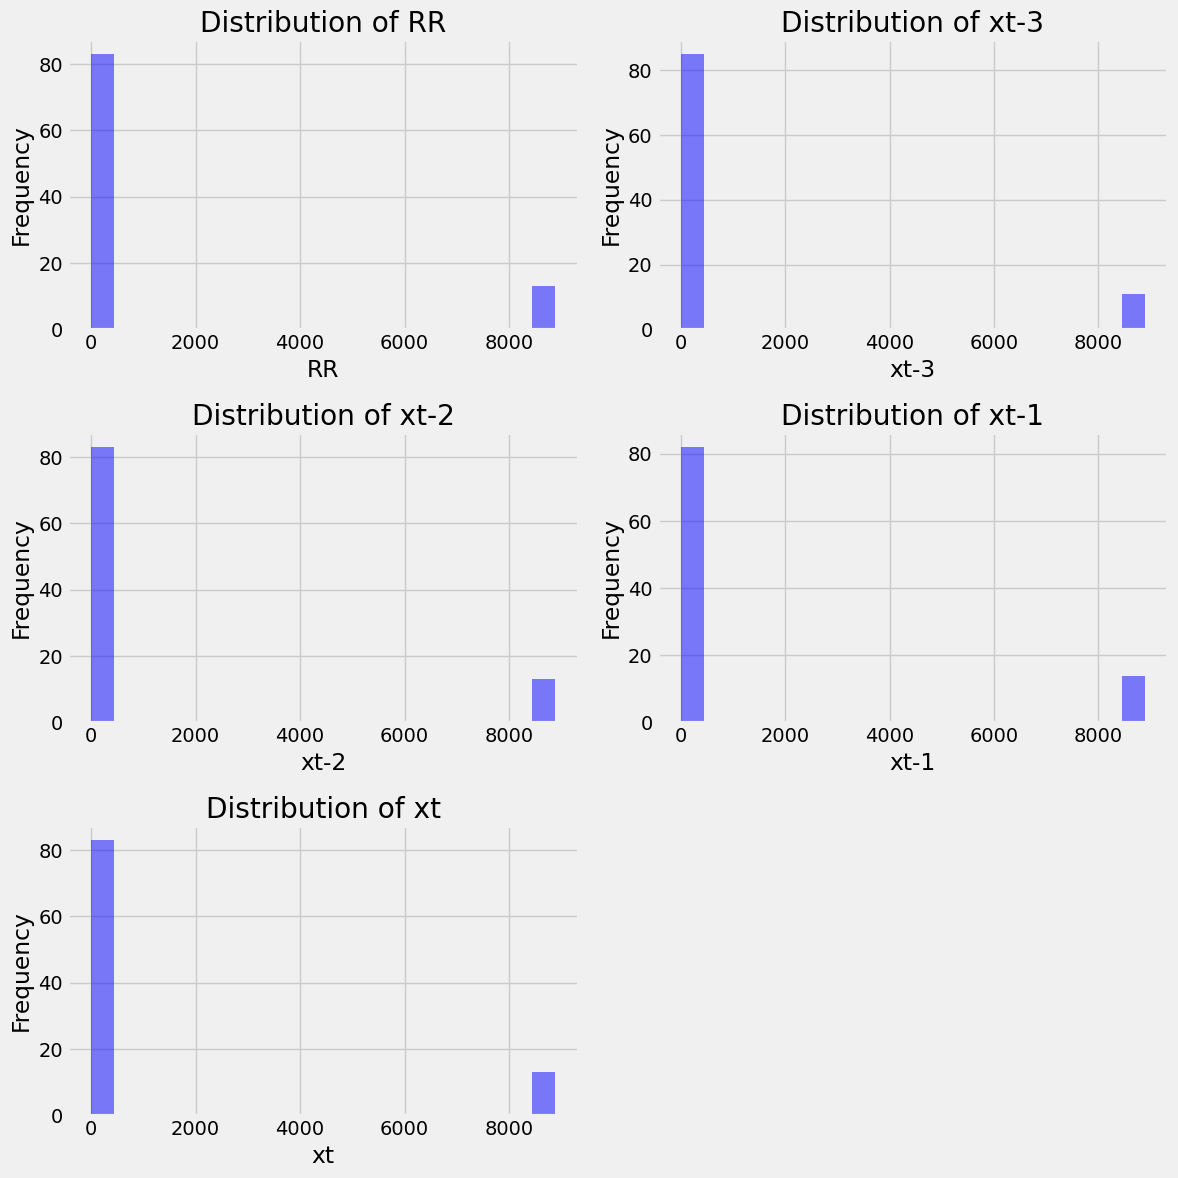

In [ ]:
# Mengambil semua kolom fitur
features = list(df_slide.columns)

# Menghitung jumlah subplot yang diperlukan
num_features = len(features)
num_rows = (num_features + 1) // 2  # Pembulatan ke atas untuk jumlah baris

# Membuat subplot sesuai dengan jumlah fitur
fig, axs = plt.subplots(num_rows, 2, figsize=(12, num_rows*4))

# Melakukan plotting untuk setiap fitur
for i, feature in enumerate(features):
    row = i // 2
    col = i % 2
    axs[row, col].hist(df_slide[feature], bins=20, color='blue', alpha=0.5)
    axs[row, col].set_title(f'Distribution of {feature}')
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('Frequency')

# Menghapus subplot yang tidak terpakai
if num_features % 2 == 1:
    fig.delaxes(axs[num_rows-1, 1])

# Menyesuaikan layout
plt.tight_layout()

# Menampilkan plot
plt.show()

# Mengecek apakah ada null pada data

In [ ]:
print(df_slide.isnull().sum())

RR              0
xt-3            0
xt-2            0
xt-1            0
xt              0
predicted_xt    0
dtype: int64


<ipython-input-26-bfafc9bd8642>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(features))


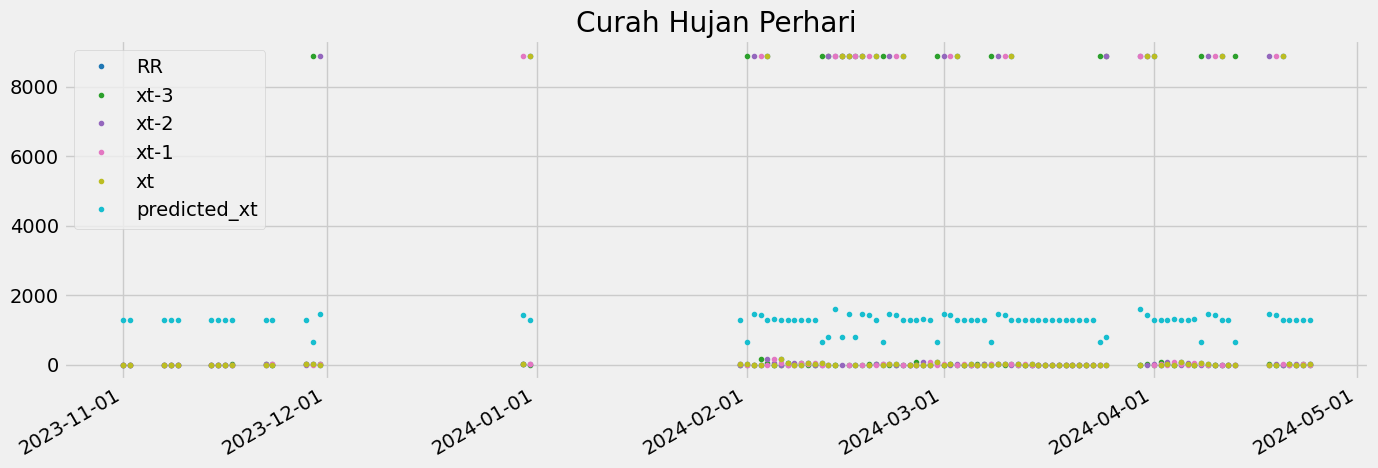

In [ ]:
features = df_slide.columns
colors = plt.cm.get_cmap('tab10', len(features))
plt.figure(figsize=(15, 5))

# Convert index to matplotlib dates
x_dates = mdates.date2num(pd.to_datetime(df_slide.index))

for i, feature in enumerate(features):
    # Ensure feature data is numeric
    y_data = pd.to_numeric(df_slide[feature], errors='coerce')

    plt.plot(x_dates, y_data, linestyle='', marker='.', color=colors(i), label=feature)

plt.title('Curah Hujan Perhari')
plt.legend()

# Format x-axis to display dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

plt.gcf().autofmt_xdate()  # Auto-format dates for better readability

plt.show()

# mengecek apakah ada data outlier

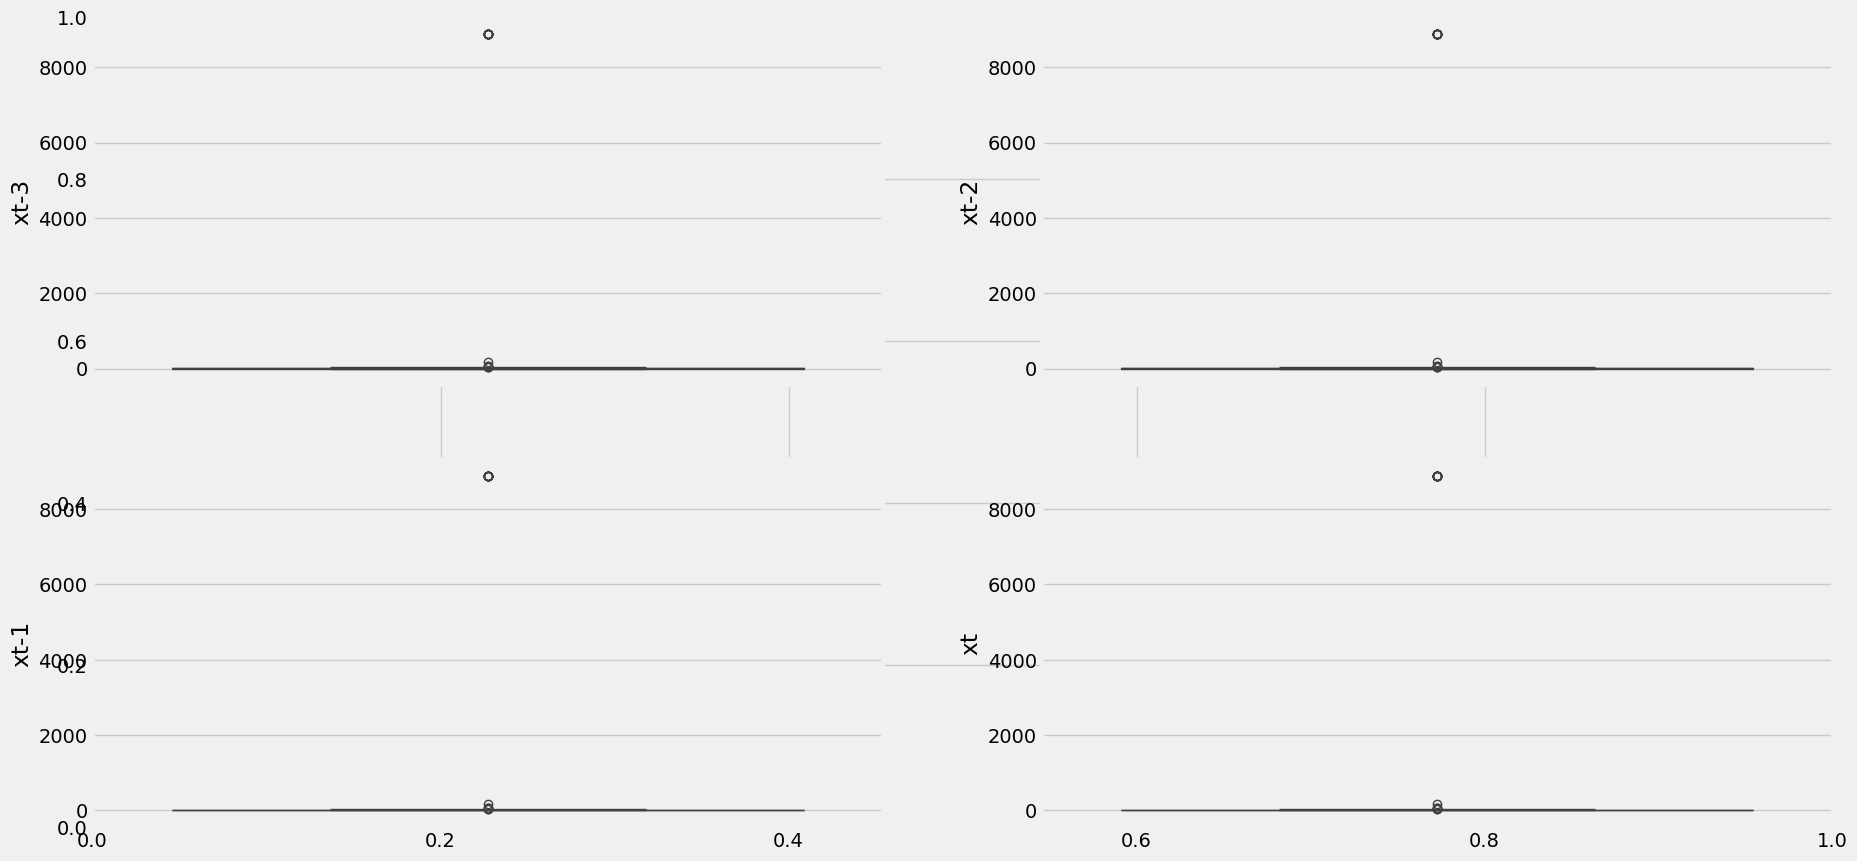

In [ ]:
features = ['xt-3', 'xt-2', 'xt-1', 'xt']
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sb.boxplot(df_slide[col])
plt.show()

# Prepocessing Data

# Mengatasi Missing Value

In [ ]:
df_slide_cleaned = df_slide.dropna()
df_slide_cleaned.isna().sum()

,0
RR,0
xt-3,0
xt-2,0
xt-1,0
xt,0
predicted_xt,0


Dapat dilihat pada pengecekan data diatas untuk mengetahui apakah ada missing Value pada data Tersebut dan setelah dicek ternyata tidak ditemukan adanya missing value.

# Normalisasi Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi semua kolom kecuali indeks
df_normalized = pd.DataFrame(scaler.fit_transform(df_slide_cleaned), columns=df_slide_cleaned.columns, index=df_slide_cleaned.index)

In [ ]:
print(df_normalized)

                  RR      xt-3      xt-2      xt-1        xt
Tanggal                                                     
2024-04-27  0.000731  0.000000  0.000000  0.000000  0.000731
2024-04-26  0.001125  0.000000  0.000000  0.000731  0.001125
2024-04-25  0.000045  0.000000  0.000731  0.001125  0.000045
2024-04-24  0.001316  0.000731  0.001125  0.000045  0.001316
2024-04-23  0.000000  0.001125  0.000045  0.001316  0.000000
...              ...       ...       ...       ...       ...
2023-11-09  0.000000  0.000000  0.000056  0.000844  0.000000
2023-11-08  0.000000  0.000056  0.000844  0.000000  0.000000
2023-11-07  0.000000  0.000844  0.000000  0.000000  0.000000
2023-11-02  0.000000  0.004118  0.000000  0.000000  0.000000
2023-11-01  0.000000  0.000000  0.000000  0.000000  0.000000

[96 rows x 5 columns]


# Modeling

In [ ]:
from sklearn.model_selection import train_test_split

pada modelling ini, saya akan menggunakan model Random Forest dan linear regression

In [ ]:
X_train_model = df_normalized.drop(columns=['xt'])
y_train_model = df_normalized['xt']

# Membagi data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train_model, y_train_model, test_size = 0.2, random_state=42, shuffle=False)

# Mulai membuat modeling

# Model Regresi Linear

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np
import pandas as pd

# Inisialisasi dan latih model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Hitung RMSE
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Tampilkan hasil evaluasi
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')  # Tampilkan RMSE
print(f'R-squared: {r2}')
print(f'MAPE: {mape * 100}%')  # MAPE dalam persentase

# Tampilkan hasil prediksi vs aktual (opsional)
# results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}, index=y_test.index)
# print(results)


Mean Squared Error: 2.1474365228962755e-32
Root Mean Squared Error: 1.4654134307069372e-16
R-squared: 1.0
MAPE: 19.734325230069302%


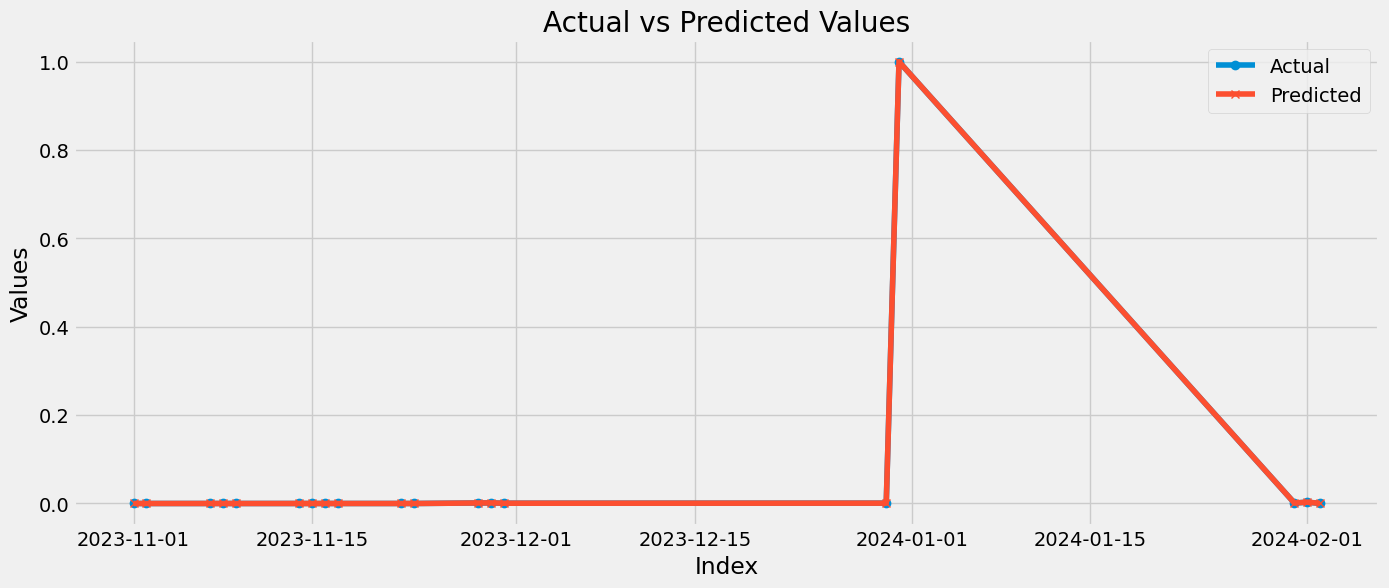

In [ ]:
# Create a DataFrame to hold the actual vs predicted results
results_regresion = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}, index=y_test.index)

# Plotting the Actual vs Predicted values
plt.figure(figsize=(15,6))
plt.plot(results_regresion.index, results_regresion['Actual'], label='Actual', marker='o')
plt.plot(results_regresion.index, results_regresion['Predicted'], label='Predicted', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

# Model Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np
import pandas as pd

# Inisialisasi dan latih model Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Hitung RMSE
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Tampilkan hasil evaluasi
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')  # Tampilkan RMSE
print(f'R-squared: {r2}')
print(f'MAPE: {mape * 100}%')  # MAPE dalam persentase

# Tampilkan hasil prediksi vs aktual (opsional)
# results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}, index=y_test.index)
# print(results)


Mean Squared Error: 2.086026100478241e-08
Root Mean Squared Error: 0.00014443081736520918
R-squared: 0.9999995812622043
MAPE: 4.993102782251728%


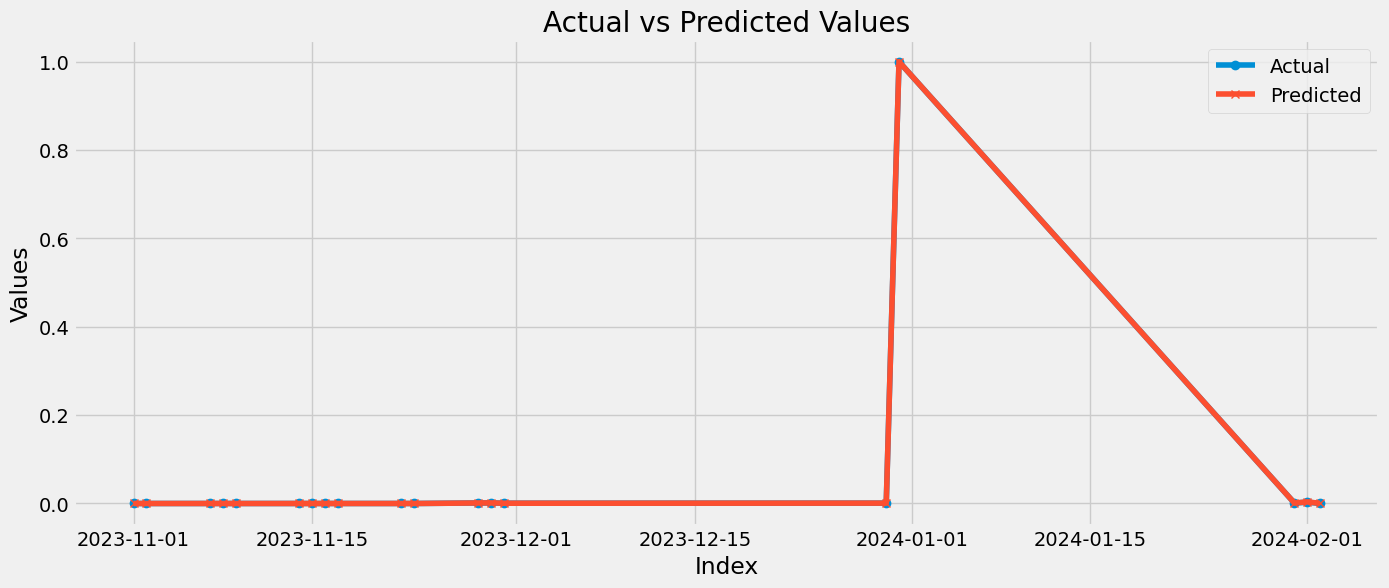

In [ ]:
# Create a DataFrame to hold the actual vs predicted results
results_forest = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}, index=y_test.index)

# Plotting the Actual vs Predicted values
plt.figure(figsize=(15,6))
plt.plot(results_forest.index, results_forest['Actual'], label='Actual', marker='o')
plt.plot(results_forest.index, results_forest['Predicted'], label='Predicted', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

# Model Ensamble Bagging

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np
import pandas as pd

# Misalkan df_slide adalah dataframe yang bersih
# X adalah semua fitur kecuali target, y adalah target (misal: 'xt' sebagai target)
X = df_slide.drop(columns=['xt'])  # Menghapus kolom target dari fitur
y = df_slide['xt']  # Menggunakan kolom 'xt' sebagai target

# Membagi dataset menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model Bagging dengan base estimator Decision Tree
base_model = DecisionTreeRegressor(random_state=42)  # Model dasar Decision Tree
model = BaggingRegressor(estimator=base_model, n_estimators=10, random_state=42)

# Latih model pada data training
model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi model menggunakan RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)  # Hitung MAPE

# Tampilkan hasil evaluasi
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'MAPE: {mape * 100}%')  # MAPE dalam persentase

# Tampilkan hasil prediksi vs aktual (opsional)
# results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}, index=y_test.index)
# print(results)


Mean Squared Error: 705.602885
Root Mean Squared Error (RMSE): 26.56318664994846
MAPE: 7.031483211416393%


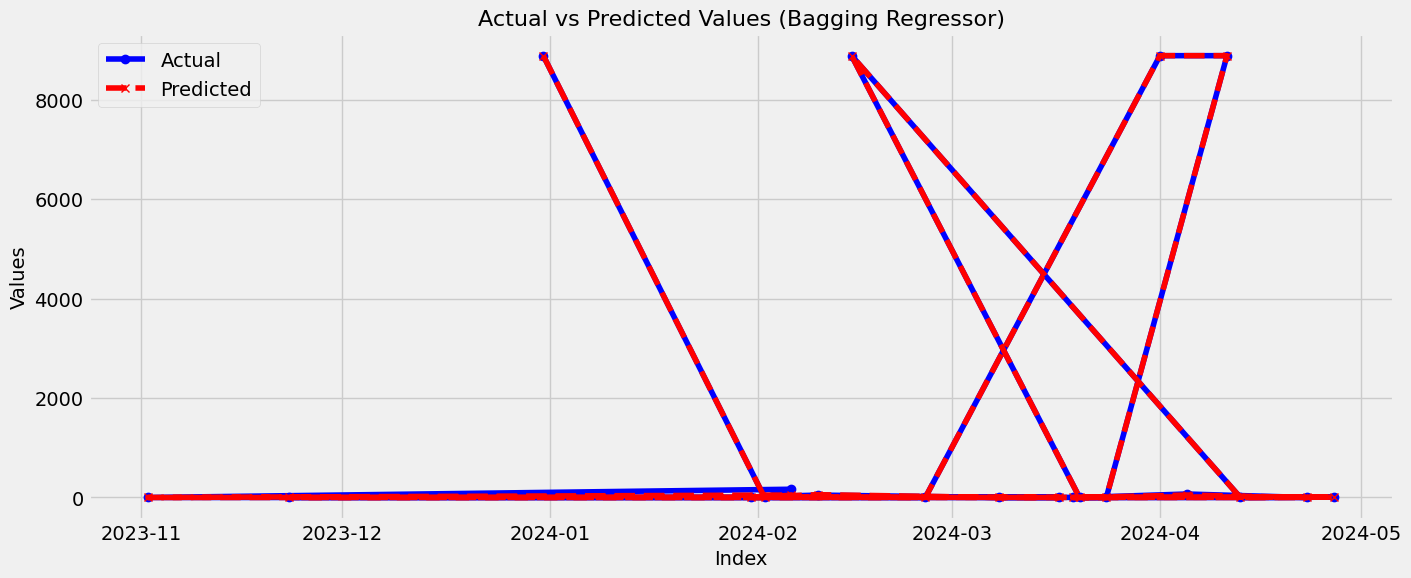

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Membuat DataFrame untuk menyimpan hasil aktual vs prediksi
results_bagging = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}, index=X_test.index)

# Plotting nilai Aktual vs Prediksi
plt.figure(figsize=(15,6))
plt.plot(results_bagging.index, results_bagging['Actual'], label='Actual', marker='o', linestyle='-', color='blue')
plt.plot(results_bagging.index, results_bagging['Predicted'], label='Predicted', marker='x', linestyle='--', color='red')
plt.title('Actual vs Predicted Values (Bagging Regressor)', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.legend()
plt.grid(True)

# Menampilkan plot
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Menghitung Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Menghitung Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Tampilkan hasil evaluasi
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'MAPE: {mape * 100}%')  # MAPE dalam persentase


Root Mean Squared Error (RMSE): 26.56318664994846
MAPE: 7.031483211416393%


# Kesimpulan

Dari Beberapa Model yang saya gunakan untuk Evaluasi Prediksi ditemukan Metode yang Errornya Paling rendah diantara yang lainnya yang mana beberapa model yang saya gunakan yaitu : Regresi Linier, Random Forest dan Ensamble Bagging dan Random forest lah yang memiliki nilai error paling kecil.